## Pandas Tutorial (Indepth)

In [3]:
## Creating a pandas Dataframe
import pandas as pd

In [20]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [24, 27, 22, 32, 29],
    'City': ['New York', 'Paris', 'London', 'Berlin', 'Tokyo'],
    'Score': [85.5, 90.3, 78.9, 88.0, 92.5]
}
df = pd.DataFrame(data)
df

,Name,Age,City,Score
0,Alice,24,New York,85.5
1,Bob,27,Paris,90.3
2,Charlie,22,London,78.9
3,David,32,Berlin,88.0
4,Eva,29,Tokyo,92.5


In [21]:
# Statistical summary
df.describe()

,Age,Score
count,5.000000,5.000000
mean,26.800000,87.040000
std,3.962323,5.243854
min,22.000000,78.900000
25%,24.000000,85.500000
50%,27.000000,88.000000
75%,29.000000,90.300000
max,32.000000,92.500000


In [22]:
df.loc[1]

Name       Bob
Age         27
City     Paris
Score     90.3
Name: 1, dtype: object

In [23]:
df.loc[1:3, ['Name', 'Age']]

,Name,Age
1,Bob,27
2,Charlie,22
3,David,32


In [24]:
df[df['Age'] > 25]           # Filter rows
df[df['City'] == 'London']

,Name,Age,City,Score
2,Charlie,22,London,78.9


In [25]:
# --- Code Cell ---
df['Passed'] = df['Score'] > 80   # Add new column
df['Score'] = df['Score'] + 5     # Modify column
df

,Name,Age,City,Score,Passed
0,Alice,24,New York,90.5,True
1,Bob,27,Paris,95.3,True
2,Charlie,22,London,83.9,False
3,David,32,Berlin,93.0,True
4,Eva,29,Tokyo,97.5,True


In [26]:
# --- Code Cell ---
df.sort_values('Age',ascending=False)

,Name,Age,City,Score,Passed
3,David,32,Berlin,93.0,True
4,Eva,29,Tokyo,97.5,True
1,Bob,27,Paris,95.3,True
0,Alice,24,New York,90.5,True
2,Charlie,22,London,83.9,False


### 9. Grouping and Aggregation

In [27]:
df.groupby('City')['Score'].mean()

City
Berlin      93.0
London      83.9
New York    90.5
Paris       95.3
Tokyo       97.5
Name: Score, dtype: float64

In [28]:
df.groupby('City').agg({'Score': ['mean', 'max'], 'Age': 'min'})

Score       Age
          mean   max min
City                    
Berlin    93.0  93.0  32
London    83.9  83.9  22
New York  90.5  90.5  24
Paris     95.3  95.3  27
Tokyo     97.5  97.5  29

### 10. Merging, Joining, and Concatenation

In [29]:
# --- Code Cell ---
df2 = pd.DataFrame({
    'Name': ['Alice', 'Bob'],
    'Country': ['USA', 'France']
})
df = pd.merge(df, df2, on='Name', how='left')   # Merge
df

,Name,Age,City,Score,Passed,Country
0,Alice,24,New York,90.5,True,USA
1,Bob,27,Paris,95.3,True,France
2,Charlie,22,London,83.9,False,NaN
3,David,32,Berlin,93.0,True,NaN
4,Eva,29,Tokyo,97.5,True,NaN


In [30]:
# Merge Horizontally
df3 = pd.DataFrame({
    'Name': ['Mike', 'John'],
    'Age': [24, 27],
    'City': ['New York', 'Paris'],
    'Score': [85.5, 90.3],
    'Passed':[True, True],
    'Country': ['USA', 'France']
})

new_df = pd.concat([df, df3], axis=0)
new_df

,Name,Age,City,Score,Passed,Country
0,Alice,24,New York,90.5,True,USA
1,Bob,27,Paris,95.3,True,France
2,Charlie,22,London,83.9,False,NaN
3,David,32,Berlin,93.0,True,NaN
4,Eva,29,Tokyo,97.5,True,NaN
0,Mike,24,New York,85.5,True,USA
1,John,27,Paris,90.3,True,France


### 11. Working with Dates

In [31]:
df['Date'] = pd.date_range('2024-01-01', periods=len(df))
df['Year'] = df['Date'].dt.year

In [32]:
df

,Name,Age,City,Score,Passed,Country,Date,Year
0,Alice,24,New York,90.5,True,USA,2024-01-01,2024
1,Bob,27,Paris,95.3,True,France,2024-01-02,2024
2,Charlie,22,London,83.9,False,NaN,2024-01-03,2024
3,David,32,Berlin,93.0,True,NaN,2024-01-04,2024
4,Eva,29,Tokyo,97.5,True,NaN,2024-01-05,2024


### 13. Advanced: Apply, Map, and Lambda

In [33]:
df['Age group'] = df['Age'].apply(lambda x: 'Young' if x < 30 else 'Old')
df

,Name,Age,City,Score,Passed,Country,Date,Year,Age group
0,Alice,24,New York,90.5,True,USA,2024-01-01,2024,Young
1,Bob,27,Paris,95.3,True,France,2024-01-02,2024,Young
2,Charlie,22,London,83.9,False,NaN,2024-01-03,2024,Young
3,David,32,Berlin,93.0,True,NaN,2024-01-04,2024,Old
4,Eva,29,Tokyo,97.5,True,NaN,2024-01-05,2024,Young


### 14. Displaying DataFrame Styles

In [36]:
df.style.highlight_max(subset=['Score'], color='green')

,Name,Age,City,Score,Passed,Country,Date,Year,Age group
0,Alice,24,New York,90.500000,True,USA,2024-01-01 00:00:00,2024,Young
1,Bob,27,Paris,95.300000,True,France,2024-01-02 00:00:00,2024,Young
2,Charlie,22,London,83.900000,False,nan,2024-01-03 00:00:00,2024,Young
3,David,32,Berlin,93.000000,True,nan,2024-01-04 00:00:00,2024,Old
4,Eva,29,Tokyo,97.500000,True,nan,2024-01-05 00:00:00,2024,Young


## Column Renaming

In [48]:
df.rename(columns={'Name': 'Full Name', 'City': 'Location'}, inplace=True)
df

,Full Name,Age,Location,Score,Passed,Country,Date,Year,Age group
0,Alice,24,New York,90.5,True,USA,2024-01-01,2024,Young
1,Bob,27,Paris,95.3,True,France,2024-01-02,2024,Young
2,Charlie,22,London,83.9,False,NaN,2024-01-03,2024,Young
3,David,32,Berlin,93.0,True,NaN,2024-01-04,2024,Old
4,Eva,29,Tokyo,97.5,True,NaN,2024-01-05,2024,Young


## Pandas Dataframe Manipulation Questions

### Pandas DataFrame Cleaning Questions

1. **String Cleaning:**  
    - Remove any leading or trailing whitespace from all string columns in `df_example`.

2. **Outlier Detection:**  
    - Find all rows in `df` where the `Score` is more than 2 standard deviations from the mean.

3. **Column Renaming:**  
    - Rename the column `Age group` in `df` to `Age_Category`.

4. **Index Reset:**  
    - Reset the index of `new_df` after cleaning, dropping the old index.

In [40]:
# Example DataFrame
df_example = pd.DataFrame({
    'Full Name': ['Anik Bose', 'John Doe', 'Jane Smith'],
    'Details': ['anikbose@gmail.com-6290200929', 'johndoe@gmail.com-9876543210', 'janesmith@gmail.com-1234567890']
})
df_example

,Full Name,Details
0,Anik Bose,anikbose@gmail.com-6290200929
1,John Doe,johndoe@gmail.com-9876543210
2,Jane Smith,janesmith@gmail.com-1234567890


In [47]:
# Split 'Full Name' into 'First Name' and 'Last Name'
df_example[['First Name', 'Last Name']] = df_example['Full Name'].str.split(' ', expand=True)
df_example[['Email', 'Phone Number']] = df_example['Details'].str.split('-', expand=True)
df_example[['First Name','Last Name', 'Email', 'Phone Number']]

,First Name,Last Name,Email,Phone Number
0,Anik,Bose,anikbose@gmail.com,6290200929
1,John,Doe,johndoe@gmail.com,9876543210
2,Jane,Smith,janesmith@gmail.com,1234567890


## Outlier Detcetion Form a Dataframe

In [ ]:
## Outlier Detection of a Pandas Column

df = pd.DataFrame({
    'Scores': [10, 20, 30, 40, 50, 1000]  # 1000 is an outlier
})
df

# Outlier Detection
import numpy as np

def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

outliers = detect_outliers_iqr(df['Scores'])

df['Outlier'] = outliers
df


,Scores,Outlier
0,10,False
1,20,False
2,30,False
3,40,False
4,50,False
5,1000,True


In [52]:
df[df['Outlier'] == True]  # Filter outliers


,Scores,Outlier
5,1000,True


## Create a Dataframe of Scores and Find

1. Mean
2. median
3. Mode
4. Variance
5. Standard Deviation

In [67]:
len(np.random.randn(100))

100

In [64]:
df = pd.DataFrame({
    'Scores':np.random.randn(100) * 10 + 50,  # Normal distribution
})
df.head()

,Scores
0,41.803734
1,61.228634
2,66.001611
3,45.586642
4,45.389107


Mean: 49.28333212508749, Median: 49.215430302637856, Mode: 31.10036542369125
Variance: 65.9854793112307 , Standard Deviation: 8.123144668860126


(array([ 2.,  1.,  2.,  3.,  7.,  8.,  8., 13.,  5., 11., 11.,  6.,  6.,
         7.,  0.,  3.,  2.,  3.,  0.,  2.]),
 array([31.10036542, 33.08383531, 35.06730519, 37.05077508, 39.03424496,
        41.01771484, 43.00118473, 44.98465461, 46.9681245 , 48.95159438,
        50.93506427, 52.91853415, 54.90200403, 56.88547392, 58.8689438 ,
        60.85241369, 62.83588357, 64.81935346, 66.80282334, 68.78629322,
        70.76976311]),
 <BarContainer object of 20 artists>)

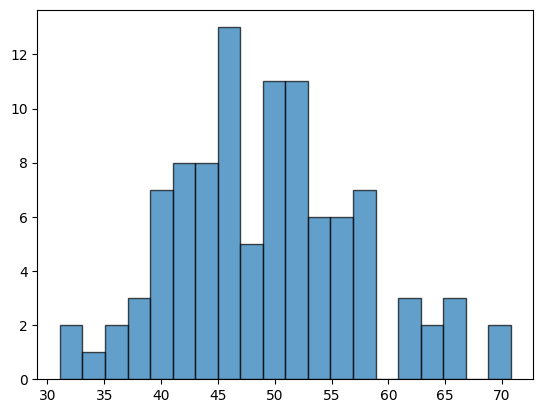

In [65]:
## 1. Calculate the mean, median, mode, variance, and standard deviation of the scores.

mean = df['Scores'].mean()
median = df['Scores'].median()
mode = df['Scores'].mode()[0]

print(f"Mean: {mean}, Median: {median}, Mode: {mode}")

def calculate_variance_std(data):
    n = len(data)
    mean = sum(data)/n
    variance = sum((x - mean) ** 2 for x in data) / n
    std_dev = variance ** 0.5
    return variance, std_dev

variance, std = calculate_variance_std(df['Scores'])
print(f"Variance: {variance} , Standard Deviation: {std}")

## 2. Create a histogram of the scores.
import matplotlib.pyplot as plt
plt.hist(df['Scores'], bins=20, edgecolor='black', alpha=0.7)

## Dataframe Cleaning

In [68]:
df = pd.DataFrame({
    'Text': [
        'This is a sample! 123 :)',
        'Wow!!! Such a #great day @2025',
        'The quick brown fox, jumps over 2 lazy dogs.',
        'Email me at test@example.com!!!',
        'Stopwords and numbers 456 should be removed.'
    ],
    'Sentiment': ['positive', 'positive', 'neutral', 'neutral', 'negative']
})
df

,Text,Sentiment
0,This is a sample! 123 :),positive
1,Wow!!! Such a #great day @2025,positive
2,"The quick brown fox, jumps over 2 lazy dogs.",neutral
3,Email me at test@example.com!!!,neutral
4,Stopwords and numbers 456 should be removed.,negative


In [76]:
# Function to clean text: remove non-alphabetic, lowercase, remove stopwords
import re

stopwords = set(['is', 'a', 'the', 'at', 'and', 'be', 'should', 'such', 'me', 'over', 'this'])
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    words = text.split()
    words = [w for w in words if w not in stopwords]
    return ' '.join(words)

df['Cleaned text'] = df['Text'].apply(clean_text)
df

,Text,Sentiment,Cleaned text
0,This is a sample! 123 :),positive,sample 123
1,Wow!!! Such a #great day @2025,positive,wow great day 2025
2,"The quick brown fox, jumps over 2 lazy dogs.",neutral,quick brown fox jumps 2 lazy dogs
3,Email me at test@example.com!!!,neutral,email testexamplecom
4,Stopwords and numbers 456 should be removed.,negative,stopwords numbers 456 removed
